<a href="https://colab.research.google.com/github/daeun118/MachineLearning1/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_2%EC%B0%A8%ED%8C%80%ED%94%8C_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 44.9 MB/s eta 0:00:00


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch
import mne

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 데이터 로드

In [7]:
# # 처음 한번만 실행(압축해제)
# zip_path_train = '/content/drive/MyDrive/머신러닝1/2차팀플/train.npy.zip' # train 압축파일 경로
# zip_path_test = '/content/drive/MyDrive/머신러닝1/2차팀플/test.npy.zip' # test 압축파일 경로
# unzip_path = '/content/drive/MyDrive/머신러닝1/2차팀플' # 압축해제 파일 저장할 경로

# # unzip
# !unzip -q $zip_path_train -d $unzip_path
# !unzip -q $zip_path_test -d $unzip_path

In [8]:
data = np.load("/content/drive/MyDrive/머신러닝1/2차팀플/train.npy", allow_pickle=True)
data = data.item()
data_input = data['input']
data_label = data['label']

In [9]:
# 테스트 데이터
test_data = np.load("/content/drive/MyDrive/머신러닝1/2차팀플/test.npy", allow_pickle=True)
test_data = test_data.item()
test_data_input = test_data['input']
test_data_input.shape

(576, 1, 22, 1125)

In [10]:
print("input data shape:", data_input.shape)
print("label data shape:", data_label.shape)

input data shape: (4608, 1, 22, 1125)
label data shape: (4608, 4)


In [11]:
data_label
# 원핫인코딩 형태

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [12]:
# 원핫인코딩된 라벨을 정수 라벨로 변환
'''
    [0, 0, 0, 1]   # 클래스 3
    [0, 0, 1, 0]   # 클래스 2
    [0, 1, 0, 0]   # 클래스 1
    [1, 0, 0, 0]   # 클래스 0
'''

label = np.argmax(data_label, axis=1)
print("정수 라벨(0~3)으로 변환된 라벨 shape:", label.shape)

정수 라벨(0~3)으로 변환된 라벨 shape: (4608,)


In [13]:
# 각 라벨 개수

# 각 라벨의 빈도 계산
unique_labels, counts = np.unique(label, return_counts=True)

# 라벨별 개수 출력
for lbl, count in zip(unique_labels, counts):
    print(f"Label {lbl}: {count}개")

Label 0: 1152개
Label 1: 1152개
Label 2: 1152개
Label 3: 1152개


# 배드채널 제거

In [14]:
pip install --upgrade mne


In [15]:
data_input.shape


(4608, 1, 22, 1125)

In [16]:
import mne

# 데이터 형태
n_epochs = data_input.shape[0]
n_channels = data_input.shape[2]
n_times = data_input.shape[3]
sfreq = 250  # 샘플링 주파수 (Hz)

# 채널 정보 생성
ch_names = [f'EEG {i+1}' for i in range(n_channels)]
info = mne.create_info(ch_names, sfreq, ch_types='eeg')

# 데이터 형태 변경 (n_epochs, n_channels, n_times)
data_reshaped = data_input.squeeze().transpose(1, 0, 2)
print(data_reshaped.shape)

# 테스트 데이터 형태 변경 (n_epochs, n_channels, n_times)
test_data_reshaped = test_data_input.squeeze().transpose(1, 0, 2)
print(test_data_reshaped.shape)

# (n_channels, n_times_total)로 변경
data_for_raw = data_reshaped.reshape(n_channels, -1)
print(data_for_raw.shape)

# 배드 채널 식별 및 제거를 위한 Raw 객체 생성
raw = mne.io.RawArray(data_for_raw, info)

(22, 4608, 1125)
(22, 576, 1125)
(22, 5184000)
Creating RawArray with float64 data, n_channels=22, n_times=5184000
    Range : 0 ... 5183999 =      0.000 ... 20735.996 secs
Ready.


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).
Using matplotlib as 2D backend.


<ipython-input-17-ab6fade28dea>:3: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.plot_psd(picks='all')  # 모든 채널에 대한 PSD 플롯
<ipython-input-17-ab6fade28dea>:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(picks='all')  # 모든 채널에 대한 PSD 플롯


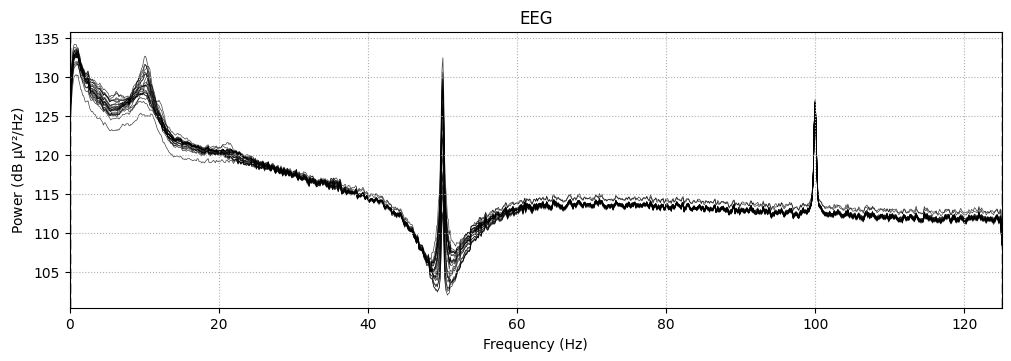

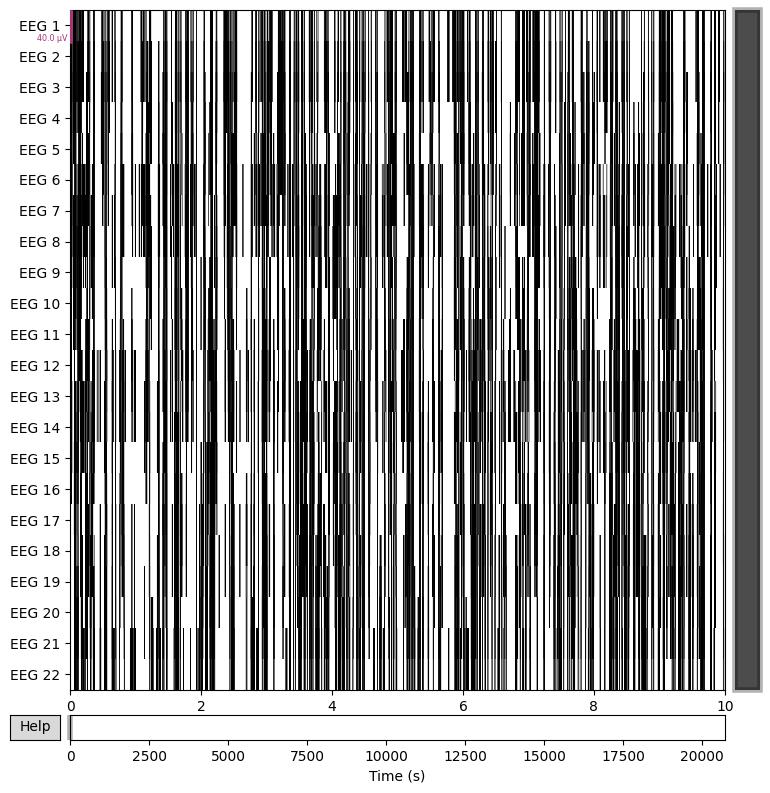

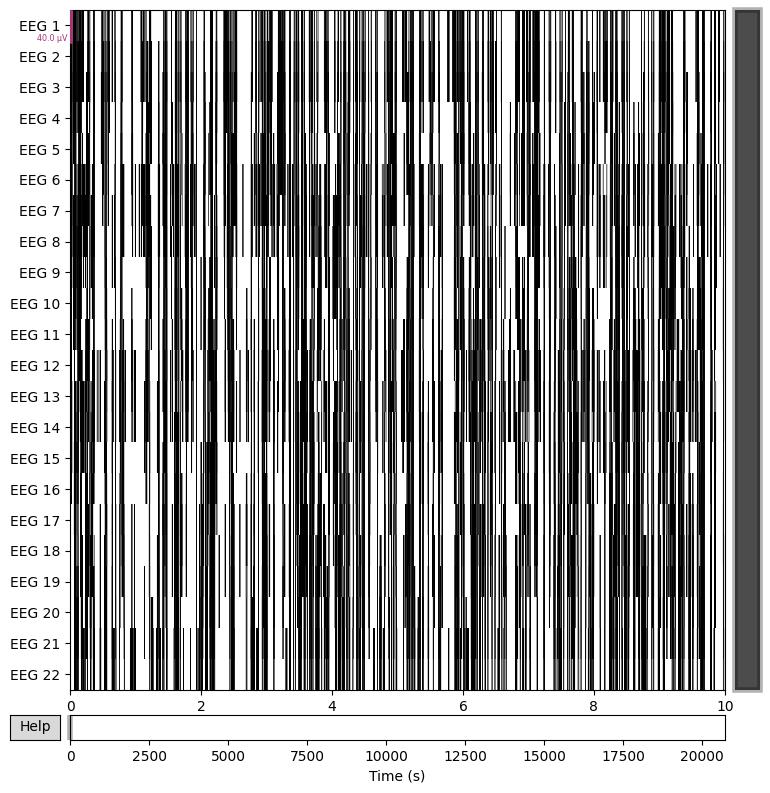

In [17]:
# 배드 채널 식별을 위한 그래프

raw.plot_psd(picks='all')  # 모든 채널에 대한 PSD 플롯
raw.plot(n_channels=n_channels, block=True)  # 모든 채널에 대한 Raw 데이터 플롯

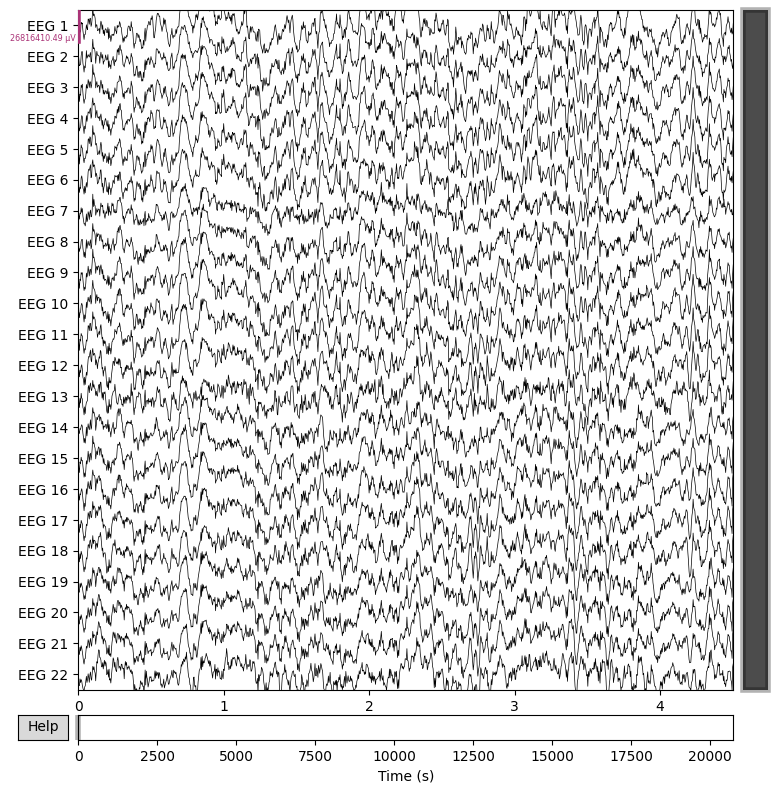

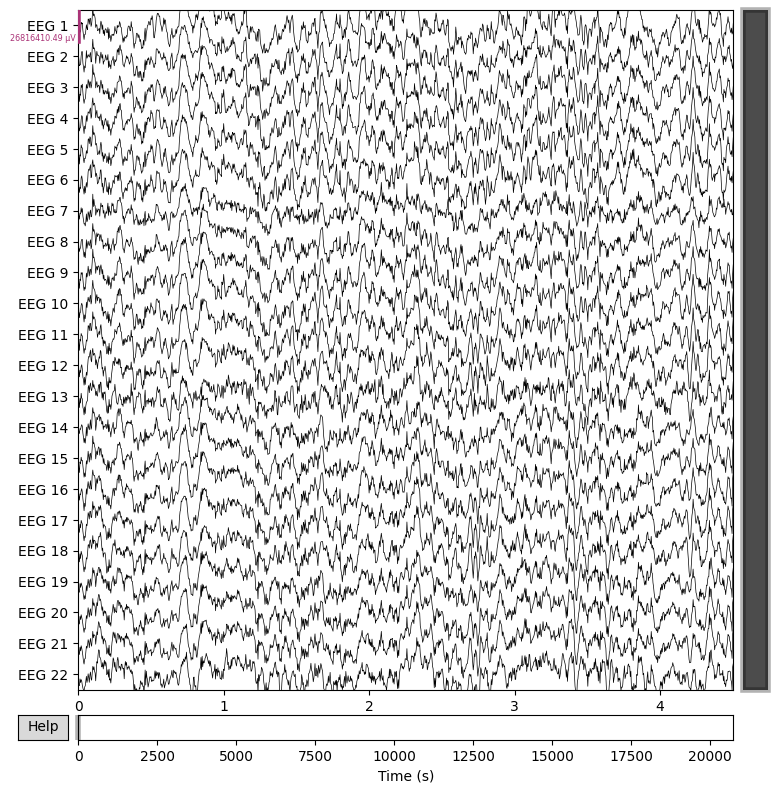

In [18]:
# Raw 데이터 플롯 (첫 4.5초, 22개 채널 표시)
raw.plot(n_channels=22, start=0, duration=4.5, scalings='auto', show_options=True, block=True)


In [19]:
# 채널 7, 8 삭제

# 채널 삭제 (0-based 인덱스)
channels_to_delete = [6, 7]  # 채널 7, 8에 해당하는 인덱스
data_reshaped_cleaned = np.delete(data_reshaped, channels_to_delete, axis=0)
# 테스트 데이터
test_data_reshaped_cleaned = np.delete(test_data_reshaped, channels_to_delete, axis=0)


# 데이터 형태 확인
print("Original shape:", data_reshaped.shape)
print("Shape after deleting channels 7 and 8:", data_reshaped_cleaned.shape)
# 테스트 데이터
print("Shape after deleting channels 7 and 8:", test_data_reshaped_cleaned.shape)

Original shape: (22, 4608, 1125)
Shape after deleting channels 7 and 8: (20, 4608, 1125)
Shape after deleting channels 7 and 8: (20, 576, 1125)


# 각 라벨 해석

*  input data: data_reshaped_cleaned(20, 4608, 1125). 채널 7,8 삭제한 인풋데이터
*  정수 라벨(0~3)으로 변환된 label data: label





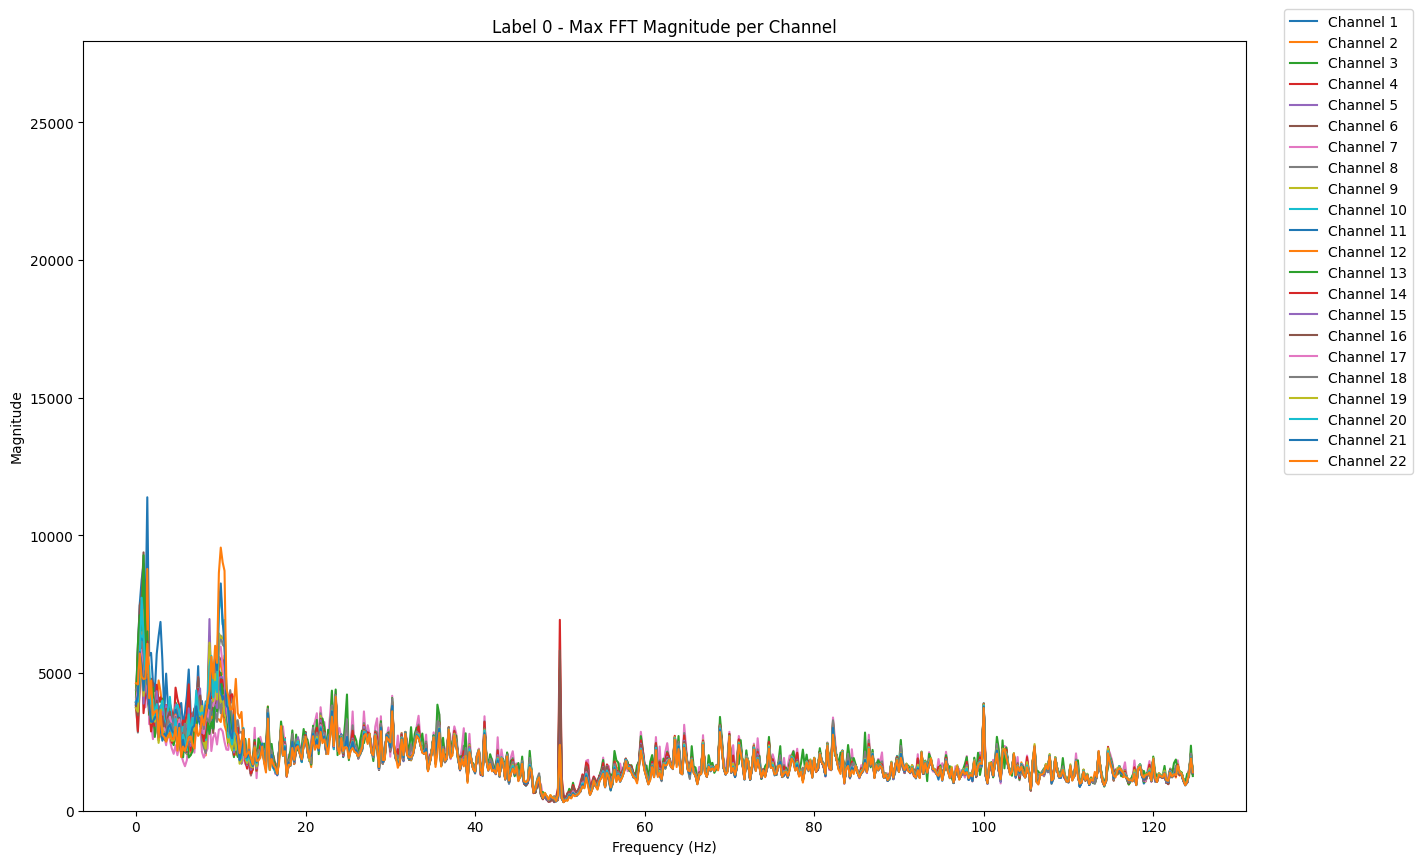

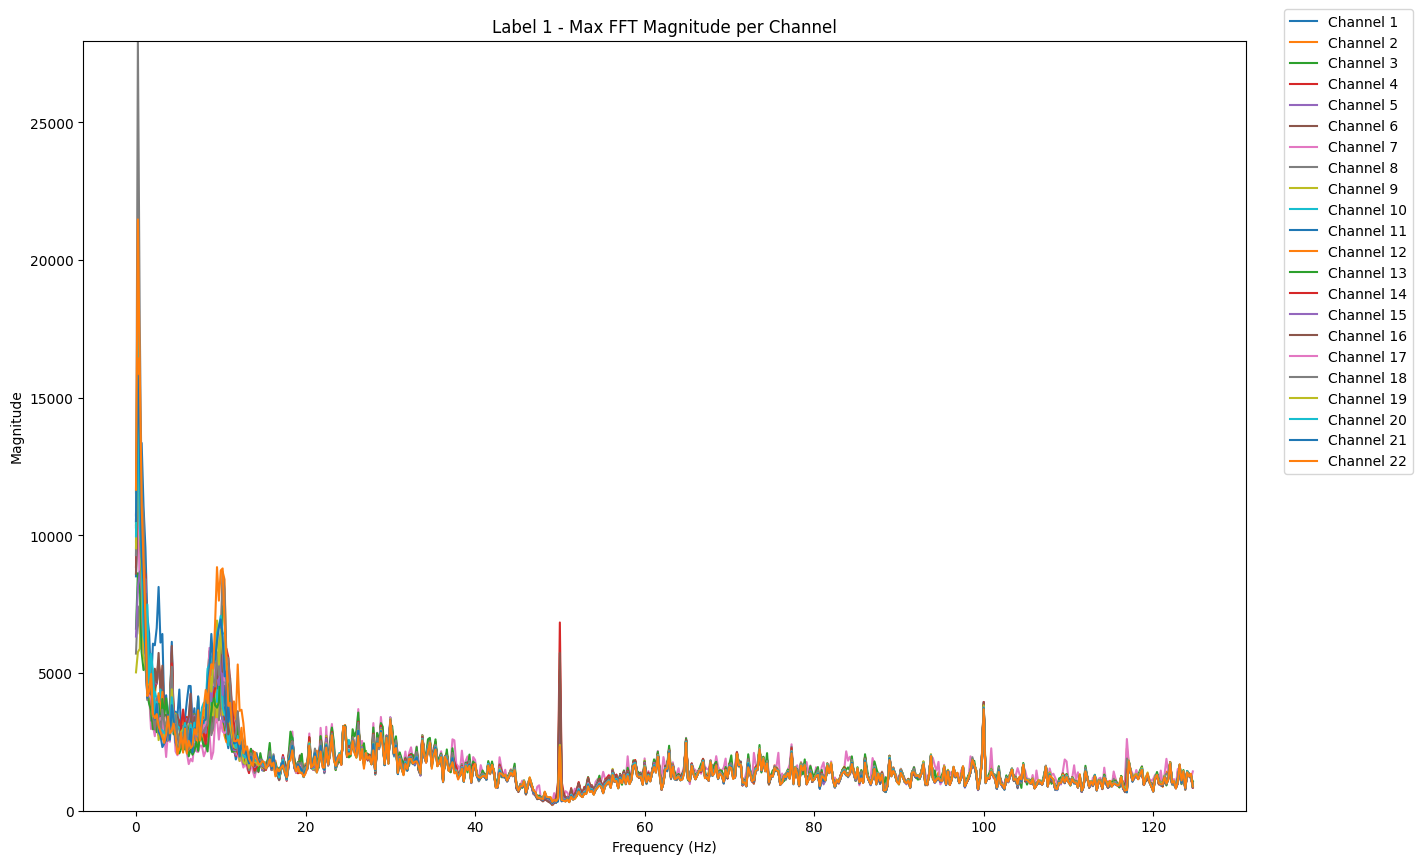

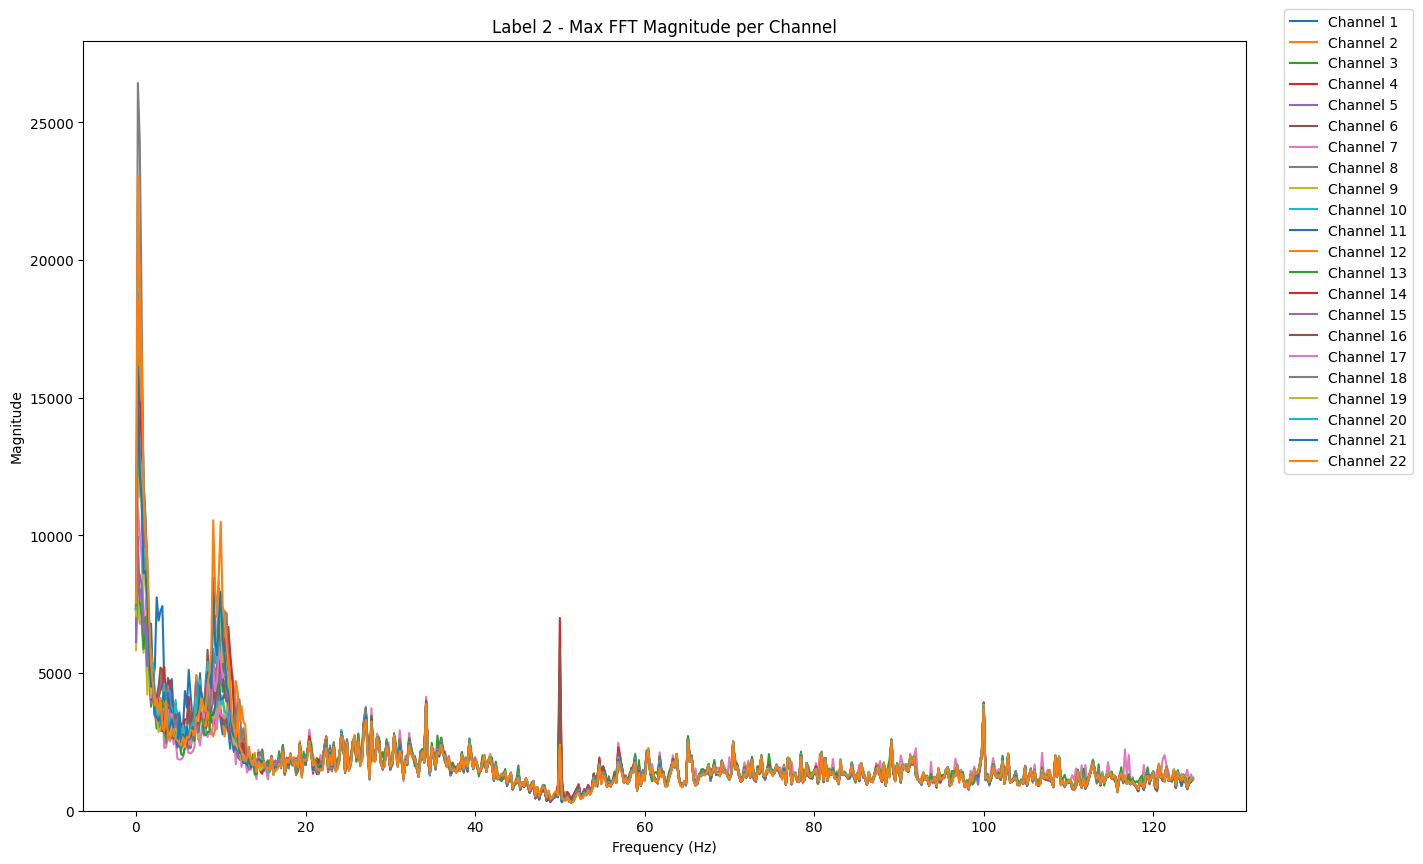

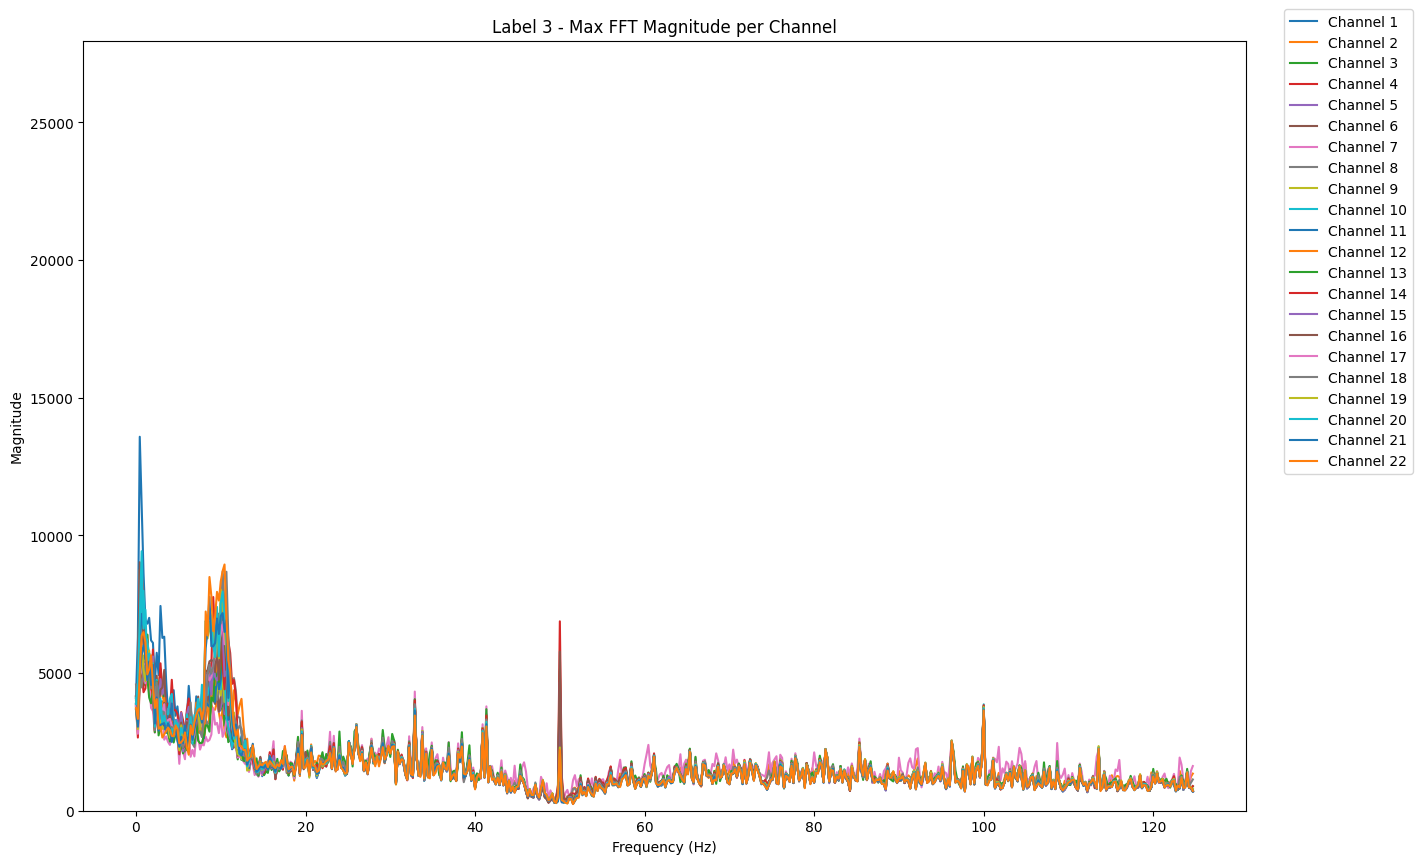

In [ ]:
# 샘플링 크기 설정 (예: 각 라벨에서 500개 샘플 사용)
sample_size = 1152

# 푸리에 변환 적용
# 데이터의 마지막 차원(시간 도메인)을 주파수 도메인으로 변환
fft_data = np.fft.fft(data_input, axis=-1)
fft_magnitude = np.abs(fft_data)

# 주파수 축 생성 (샘플링 주파수는 예를 들어 250Hz로 가정)
sampling_freq = 250  # Hz
freqs = np.fft.fftfreq(data_input.shape[-1], d=1/sampling_freq)

# Y축 최대값 계산
global_max = 0
for lbl in np.unique(label):
    label_indices = np.where(label == lbl)[0]
    if len(label_indices) > sample_size:
        label_indices = np.random.choice(label_indices, sample_size, replace=False)
    label_data = fft_magnitude[label_indices]
    max_value = np.max(label_data)
    if max_value > global_max:
        global_max = max_value

# 각 라벨별로 데이터 시각화
unique_labels = np.unique(label)
for lbl in unique_labels:
    # 라벨에 해당하는 데이터 선택 (샘플 크기 제한)
    label_indices = np.where(label == lbl)[0]
    if len(label_indices) > sample_size:
        label_indices = np.random.choice(label_indices, sample_size, replace=False)

    label_data = fft_magnitude[label_indices]

    # 각 채널별 주파수 대역의 최대값 계산
    max_fft_magnitude = np.max(label_data, axis=0).squeeze()  # (channels, frequencies)

    # 시각화
    plt.figure(figsize=(15, 10))
    for channel in range(max_fft_magnitude.shape[0]):
        plt.plot(freqs[:len(freqs)//2], max_fft_magnitude[channel, :len(freqs)//2], label=f'Channel {channel+1}')
    plt.title(f'Label {lbl} - Max FFT Magnitude per Channel')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.ylim(0, global_max)  # Y축 범위 설정
    plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.05))
    plt.show()

Creating RawArray with float64 data, n_channels=20, n_times=5184000
    Range : 0 ... 5183999 =      0.000 ... 20735.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    4.2s


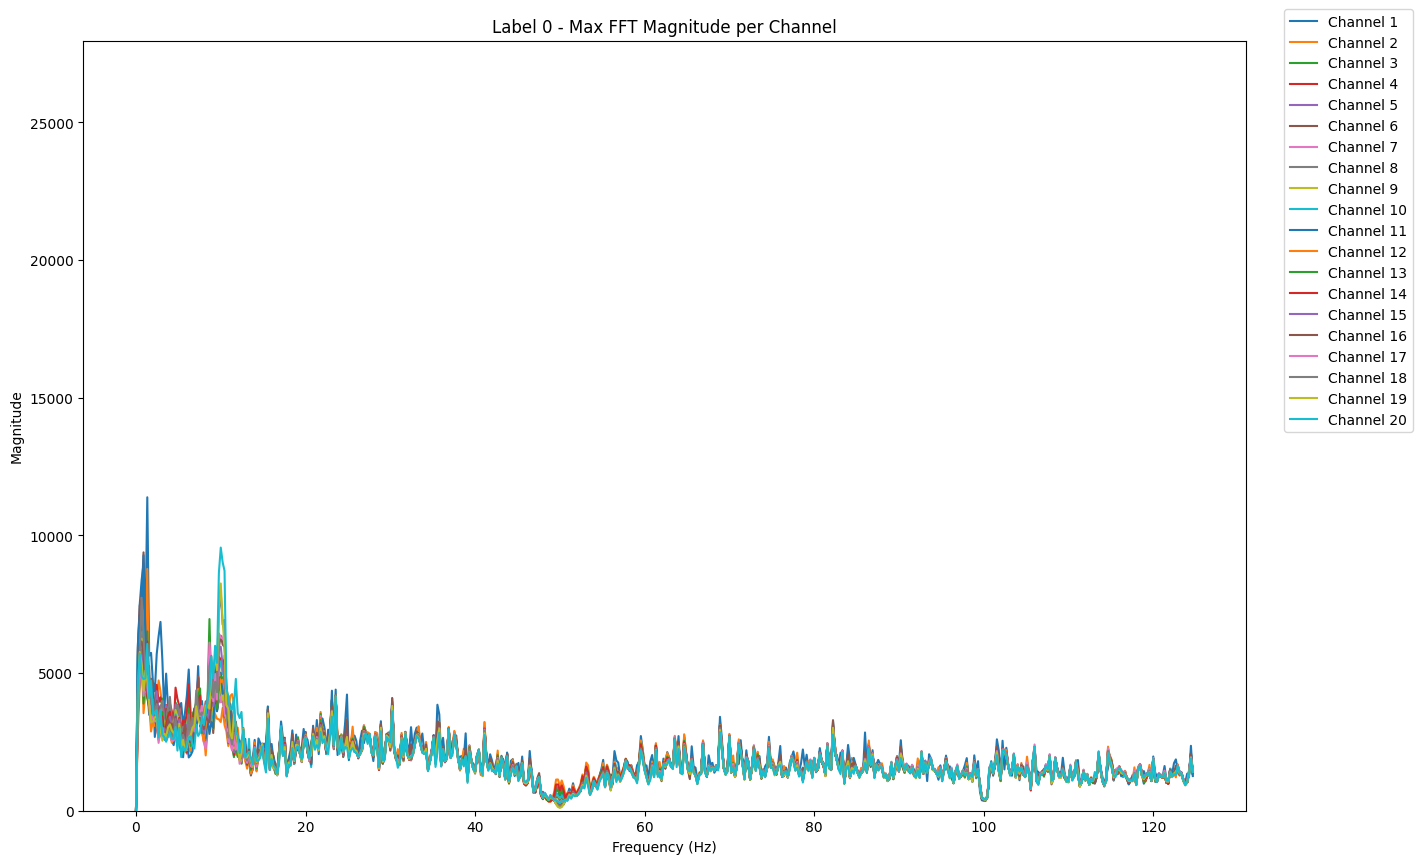

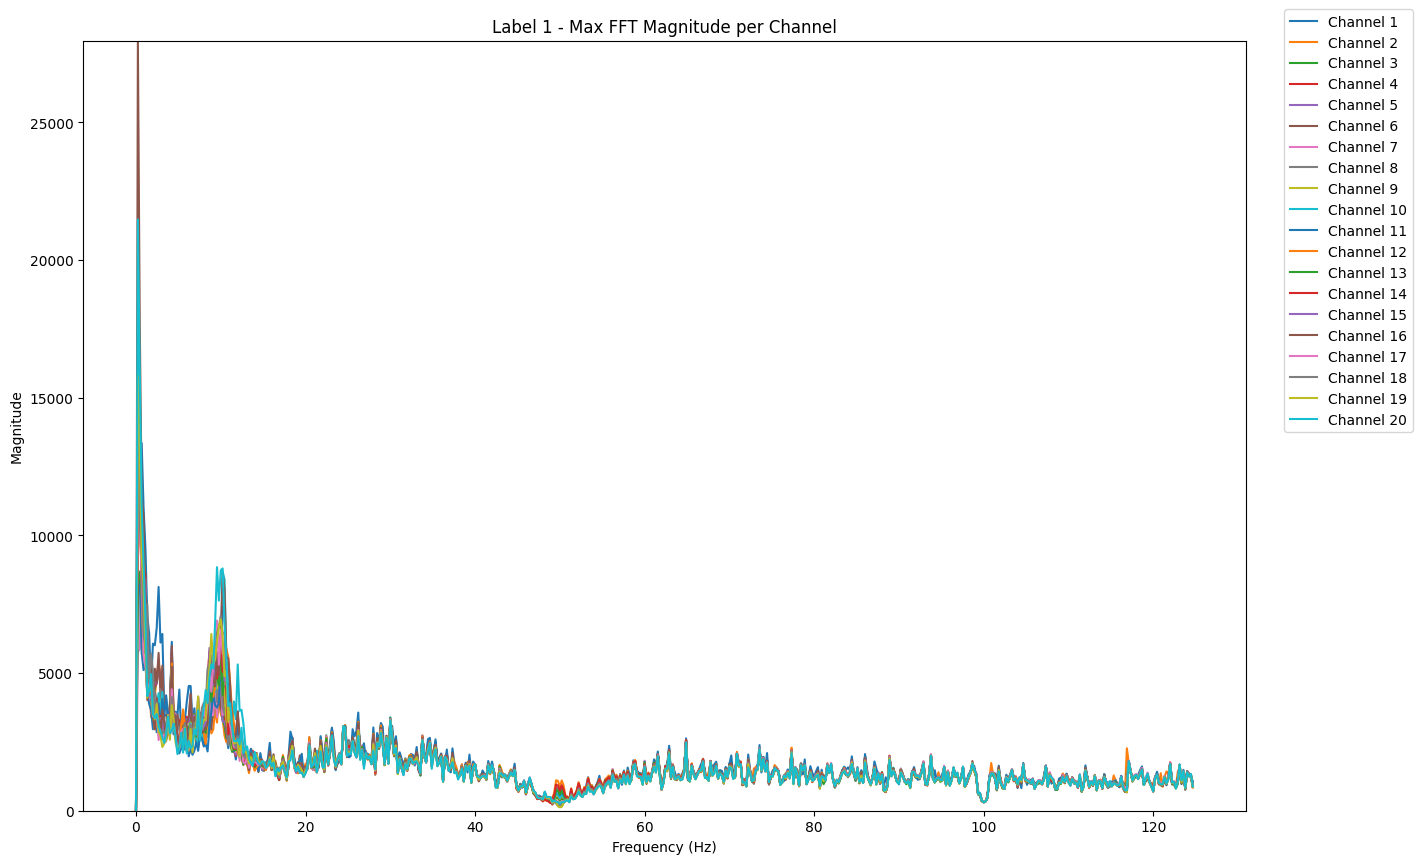

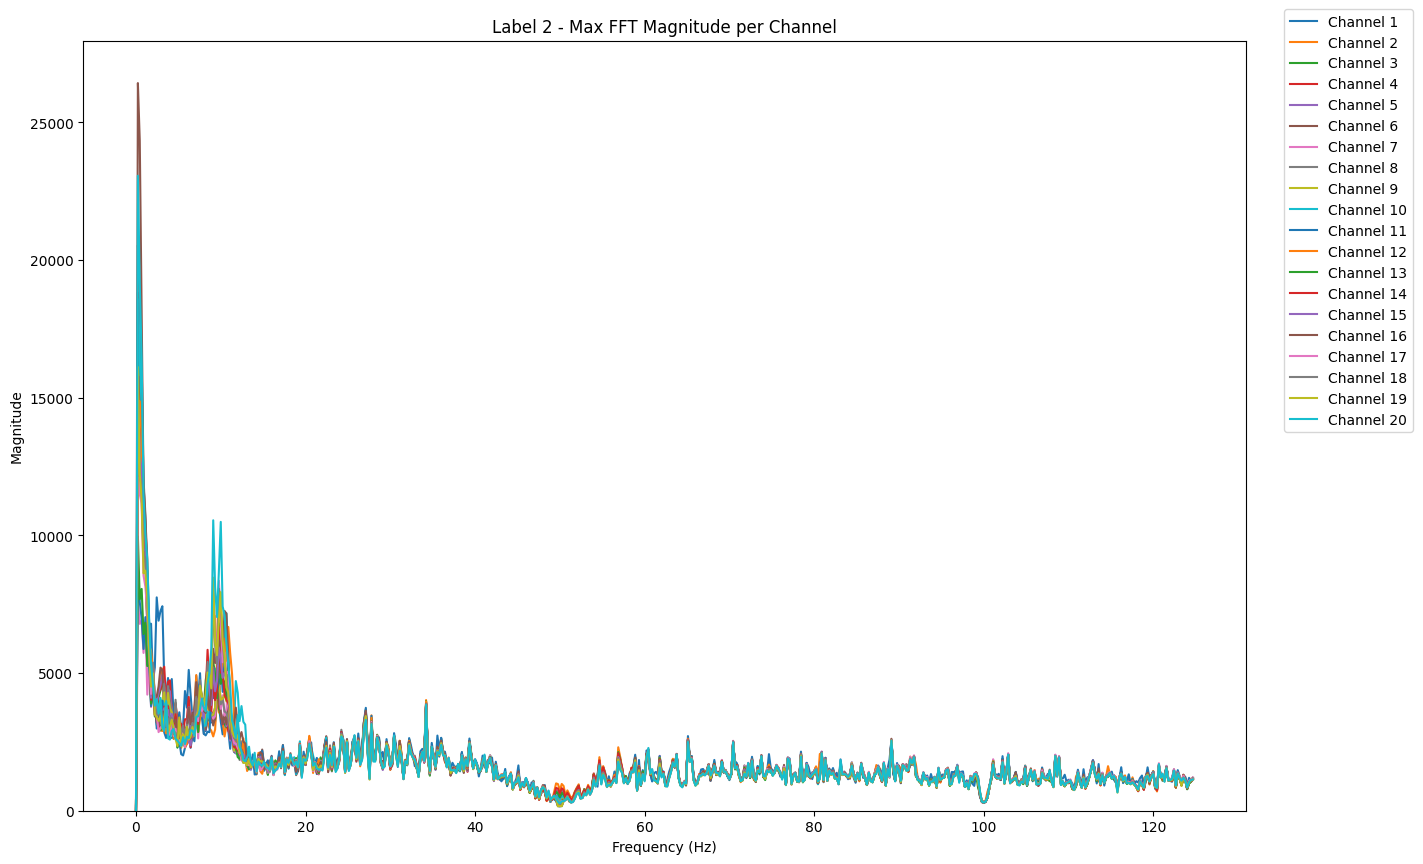

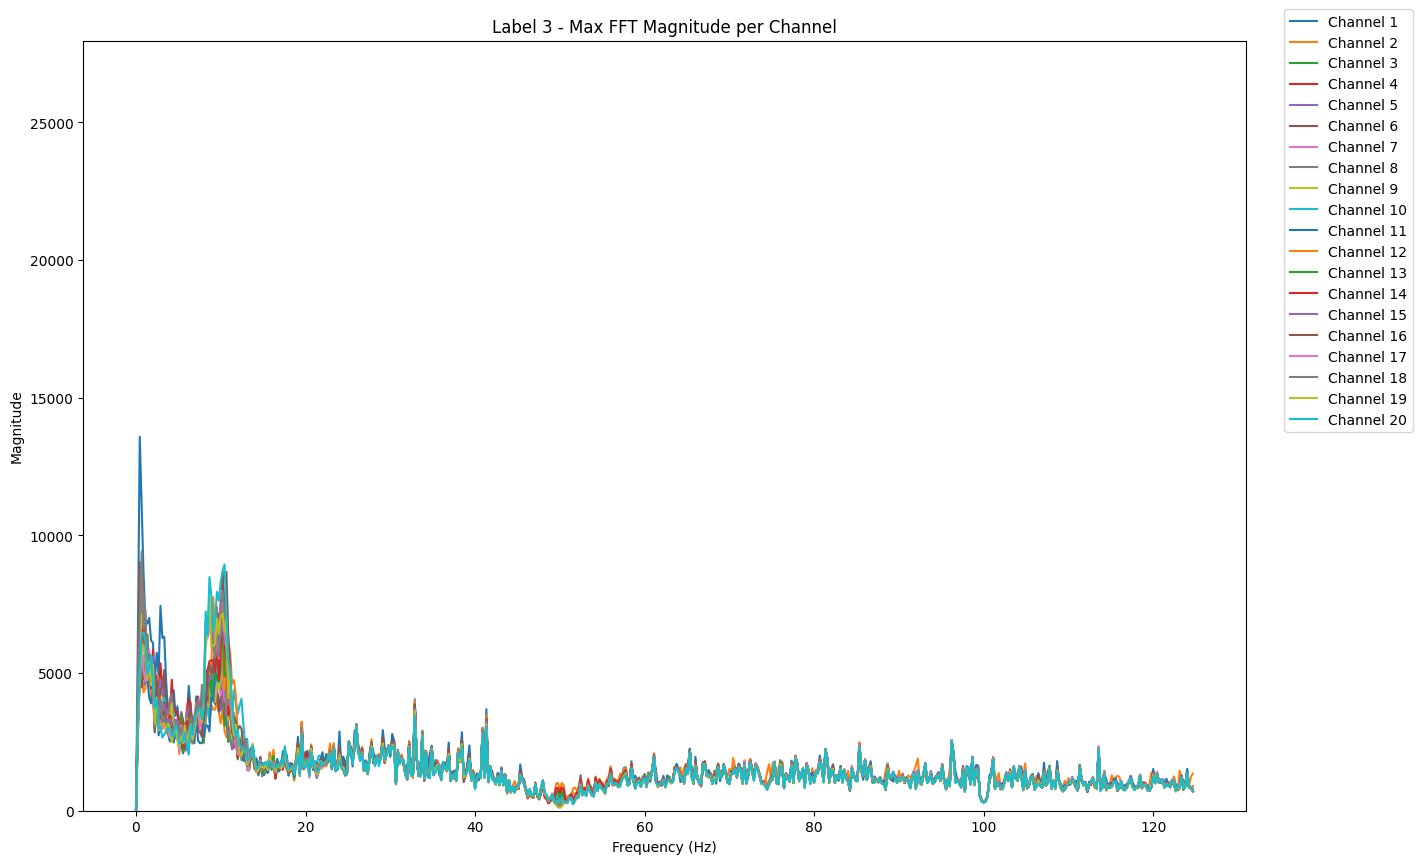

In [ ]:
# 라벨별 푸리에변환 결과 시각화(최댓값)/배드채널 제거, 50, 100(전력선잡음) 제거 후
sample_size = 1152

# DC 성분 제거
data_input_detrended = data_reshaped_cleaned - np.mean(data_reshaped_cleaned, axis=-1, keepdims=True)

# MNE RawArray 객체 생성
ch_names = [f'EEG {i+1}' for i in range(data_reshaped_cleaned.shape[0])]
info = mne.create_info(ch_names, sfreq, ch_types='eeg')
data_for_raw = data_input_detrended.reshape(data_reshaped_cleaned.shape[0], -1)
raw = mne.io.RawArray(data_for_raw, info)

# 50Hz와 100Hz 밴드스탑 필터 적용(전력선간섭 제거)
raw.notch_filter(freqs=[50, 100], filter_length='auto', phase='zero')

# 필터링된 데이터를 다시 배열 형태로 변환
filtered_data = raw.get_data().reshape(data_reshaped_cleaned.shape)

# 푸리에 변환 적용
fft_data = np.fft.fft(filtered_data, axis=-1)
fft_magnitude = np.abs(fft_data)

# 주파수 축 생성
freqs = np.fft.fftfreq(filtered_data.shape[-1], d=1/sfreq)

# Y축 최대값 계산
global_max = 0
for lbl in np.unique(label):
    label_indices = np.where(label == lbl)[0]
    if len(label_indices) > sample_size:
        label_indices = np.random.choice(label_indices, sample_size, replace=False)
    label_data = fft_magnitude[:, label_indices, :]
    max_value = np.max(label_data)
    if max_value > global_max:
        global_max = max_value

# 각 라벨별로 데이터 시각화
unique_labels = np.unique(label)
for lbl in unique_labels:
    # 라벨에 해당하는 데이터 선택 (샘플 크기 제한)
    label_indices = np.where(label == lbl)[0]
    if len(label_indices) > sample_size:
        label_indices = np.random.choice(label_indices, sample_size, replace=False)

    label_data = fft_magnitude[:, label_indices, :]

    # 각 채널별 주파수 대역의 최대값 계산
    max_fft_magnitude = np.max(label_data, axis=1)  # (channels, frequencies)

    # 시각화
    plt.figure(figsize=(15, 10))
    for channel in range(max_fft_magnitude.shape[0]):
        plt.plot(freqs[:len(freqs)//2], max_fft_magnitude[channel, :len(freqs)//2], label=f'Channel {channel+1}')
    plt.title(f'Label {lbl} - Max FFT Magnitude per Channel')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.ylim(0, global_max)  # Y축 범위 설정
    plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.05))
    plt.show()

# 밴드파워(최댓값)

In [2]:

# 주파수 밴드 정의
freq_bands = {
    'delta': (0.5, 4),
    'theta': (4, 8),
    'alpha': (8, 13),
    'beta': (13, 30),
    'gamma': (30, 45)
}

# 샘플링 주파수 설정
sfreq = 250  # 예시로 250Hz 사용, 데이터에 맞게 설정하세요

# 밴드파워 계산 함수
def bandpower(data, sf, band, window_sec=4, relative=False):
    band = np.asarray(band)
    low, high = band

    # 윈도우 크기
    nperseg = window_sec * sf

    # 웰치 메소드를 사용하여 파워 스펙트럼 밀도(PSD)를 계산
    freqs, psd = welch(data, sf, nperseg=nperseg)

    # 주파수 범위 내의 밴드파워 계산
    idx_band = np.logical_and(freqs >= low, freqs <= high)
    bp_max = np.max(psd[idx_band])  # 주파수 범위 내에서의 최댓값 계산

    if relative:
        bp_max /= np.max(psd)  # 전체 주파수 범위 내의 최댓값으로 나누어 상대 값 계산

    return bp_max

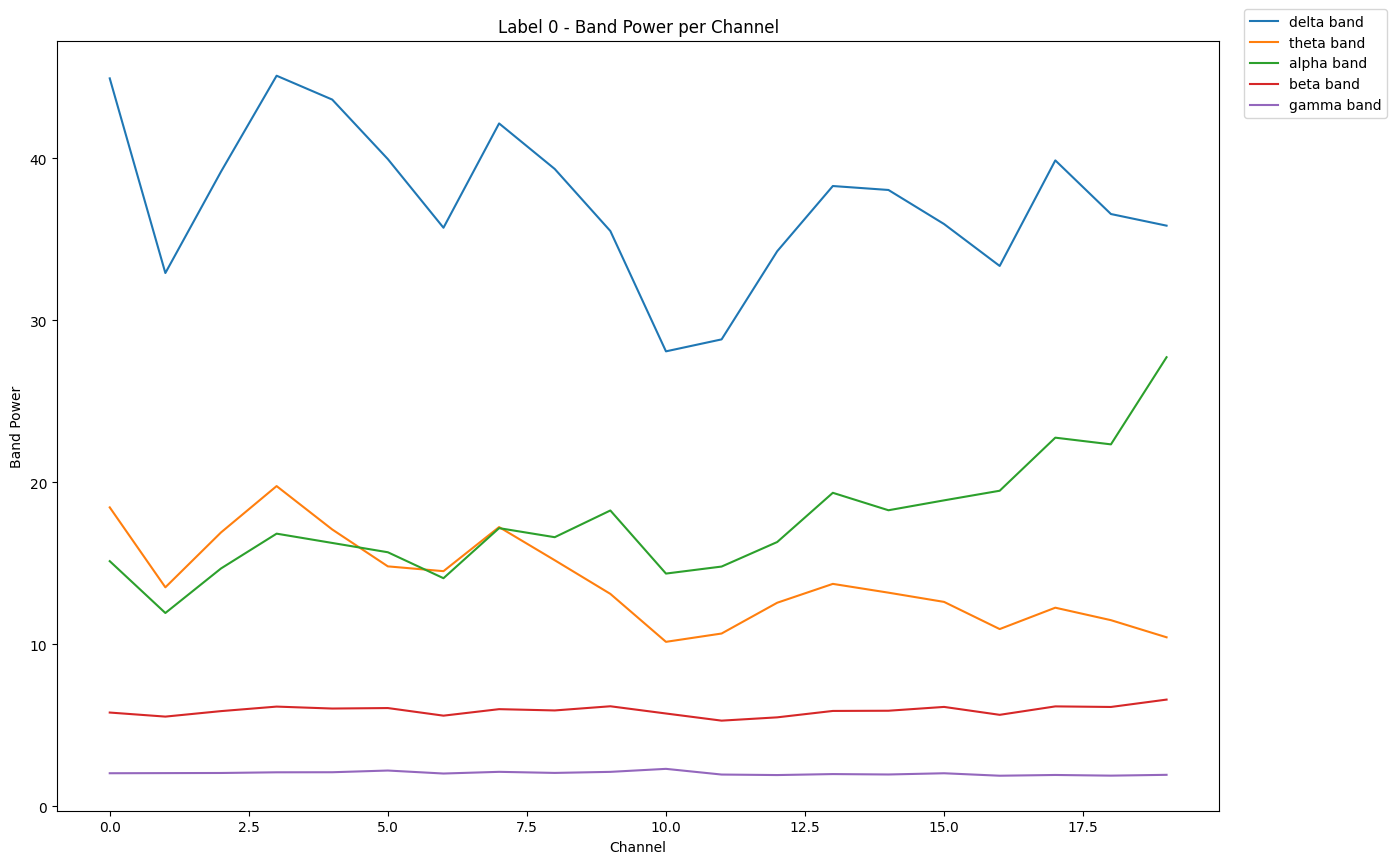

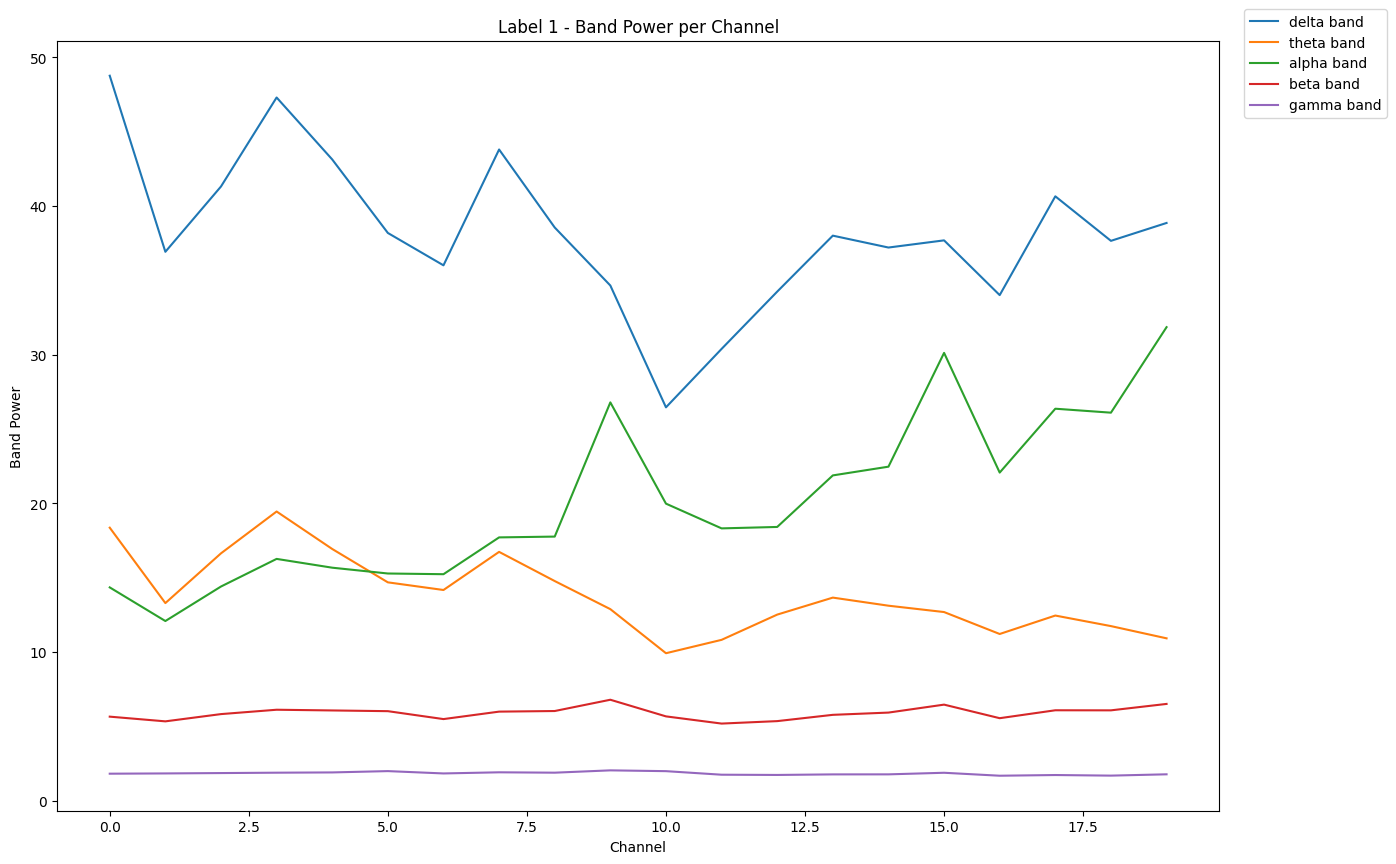

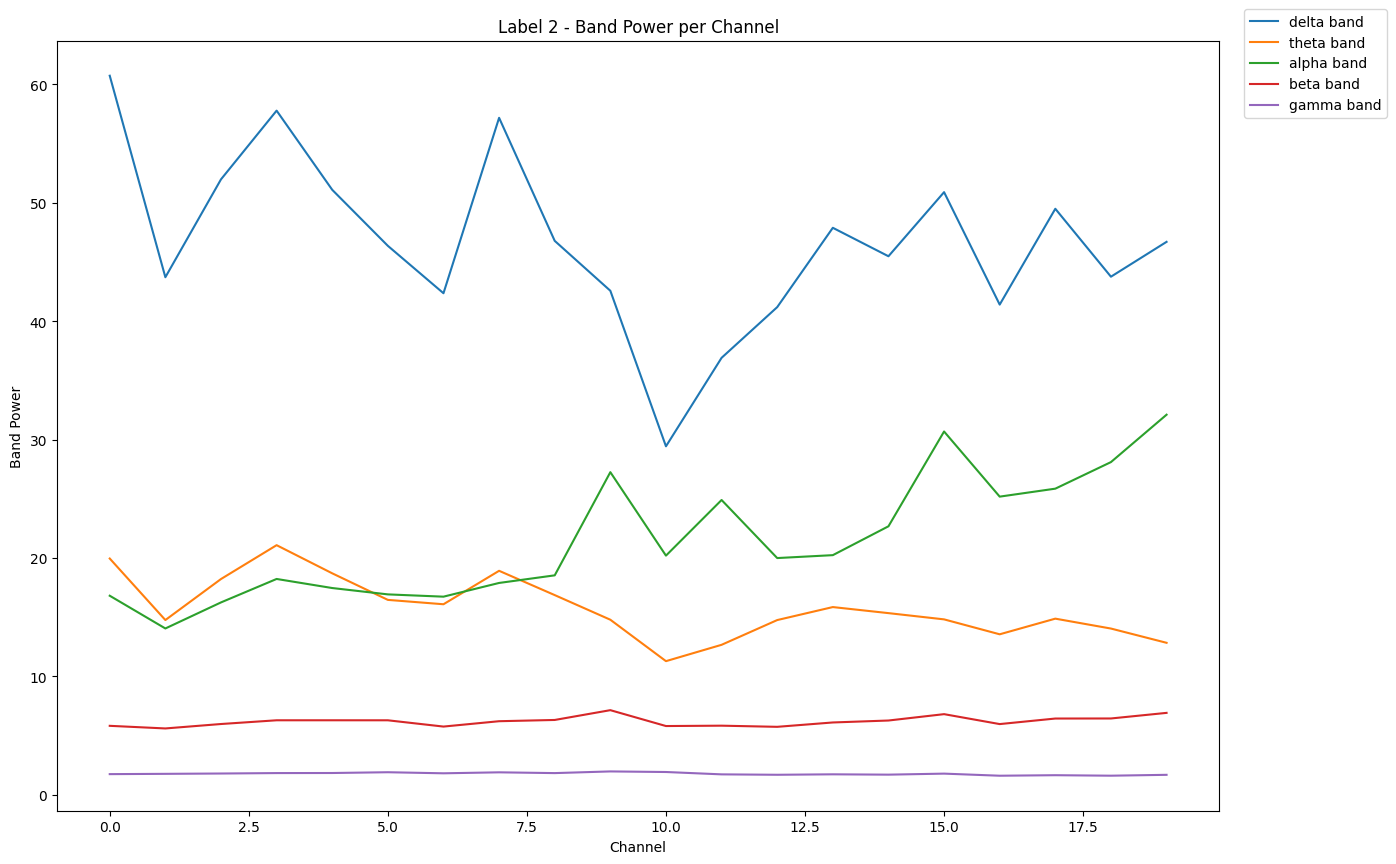

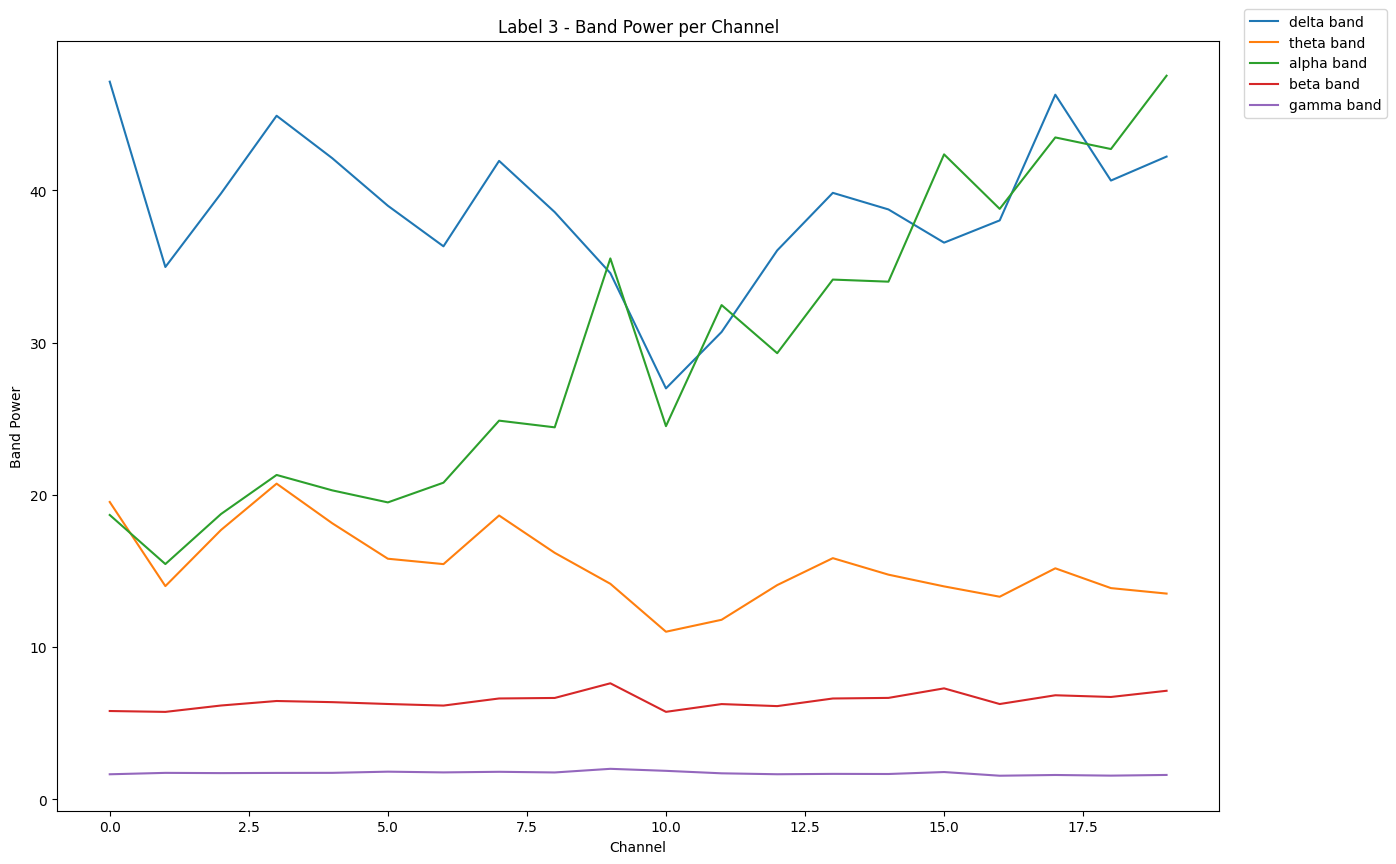

In [ ]:
# 각 라벨별로 데이터 시각화
unique_labels = np.unique(label)
for lbl in unique_labels:
    # 라벨에 해당하는 데이터 선택 (샘플 크기 제한)
    label_indices = np.where(label == lbl)[0]
    if len(label_indices) > sample_size:
        label_indices = np.random.choice(label_indices, sample_size, replace=False)

    label_data = filtered_data[:, label_indices, :]

    # 밴드파워 계산
    bandpower_data = {band: [] for band in freq_bands.keys()}
    for band, freq_range in freq_bands.items():
        for channel in range(label_data.shape[0]):
            # 채널 데이터의 각 샘플에 대해 밴드파워 계산
            bp_channel = [bandpower(label_data[channel, sample], sfreq, freq_range) for sample in range(label_data.shape[1])]
            bandpower_data[band].append(np.mean(bp_channel))  # 각 샘플의 평균 밴드파워를 저장

    # 시각화
    plt.figure(figsize=(15, 10))
    for band, bps in bandpower_data.items():
        plt.plot(range(len(bps)), bps, label=f'{band} band')
    plt.title(f'Label {lbl} - Band Power per Channel')
    plt.xlabel('Channel')
    plt.ylabel('Band Power')
    plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.05))
    plt.show()

# 모델링

*  input data: data_reshaped_cleaned(20, 4608, 1125). 채널 7,8 삭제한 인풋데이터
*  정수 라벨(0~3)으로 변환된 label data: label

* 0,3 = 0 / 1,2 = 1로 변환한 label data: new_label

In [20]:
# 라벨을 이진 라벨로 변환
new_label = np.where(np.isin(label, [0, 1, 2]), 0, 1)
new_label

array([1, 0, 0, ..., 0, 0, 0])

## data split

In [21]:
from sklearn.model_selection import train_test_split

# 데이터와 라벨 설정
X = data_reshaped_cleaned
y = new_label

# 데이터의 첫 번째 축과 두 번째 축을 바꿈
X_reshaped = np.transpose(X, (1, 0, 2))  # (4608, 20, 1125)

# train_test_split 사용
X_train, X_valid, y_train, y_valid = train_test_split(X_reshaped, y, test_size=0.2, random_state=42, stratify=y)

# 나눈 후 다시 원래 형태로 변환
X_train = np.transpose(X_train, (1, 0, 2))  # (20, 3686, 1125)
X_valid = np.transpose(X_valid, (1, 0, 2))  # (20, 922, 1125)

# 테스트 데이터
X_test = test_data_reshaped_cleaned

print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
print("X_valid shape:", X_valid.shape, "y_valid shape:", y_valid.shape)
print("X_test shape:", X_test.shape)


X_train shape: (20, 3686, 1125) y_train shape: (3686,)
X_valid shape: (20, 922, 1125) y_valid shape: (922,)
X_test shape: (20, 576, 1125)


## 각 채널에 대해 스케일링

In [22]:
from sklearn.preprocessing import StandardScaler

# 각 채널별로 스케일링
scalers = []
for i in range(X_train.shape[0]):
    scaler = StandardScaler()
    X_train[i] = scaler.fit_transform(X_train[i])
    X_valid[i] = scaler.transform(X_valid[i])
    X_test[i] = scaler.transform(X_test[i])
    scalers.append(scaler)

print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
print("X_valid shape:", X_valid.shape, "y_valid shape:", y_valid.shape)
print("X_test shape:", X_test.shape)

X_train shape: (20, 3686, 1125) y_train shape: (3686,)
X_valid shape: (20, 922, 1125) y_valid shape: (922,)
X_test shape: (20, 576, 1125)


## 밴드파워 계산(알파, 델타 밴드만)

In [23]:
# 주파수 밴드 정의 (알파 및 델타 밴드만)
freq_bands2 = {
    'delta': (0.5, 4),
    'alpha': (8, 13)
}

# 샘플링 주파수 설정: 위에서 이미 설정함

# 밴드파워 계산 함수: 위에서 이미 정의함



In [24]:
# 훈련 데이터 밴드파워 계산 및 데이터 준비
samples_train = X_train.shape[1]
channels = X_train.shape[0]
timepoints = X_train.shape[2]
bands = len(freq_bands2)
X_train_bandpower = np.zeros((samples_train, channels, bands))

for i in range(samples_train):
    for j in range(channels):
        for k, (band, freq_range) in enumerate(freq_bands2.items()):
            X_train_bandpower[i, j, k] = bandpower(X_train[j, i, :], sfreq, freq_range)

# 검증 데이터 밴드파워 계산 및 데이터 준비
samples_valid = X_valid.shape[1]
X_valid_bandpower = np.zeros((samples_valid, channels, bands))

for i in range(samples_valid):
    for j in range(channels):
        for k, (band, freq_range) in enumerate(freq_bands2.items()):
            X_valid_bandpower[i, j, k] = bandpower(X_valid[j, i, :], sfreq, freq_range)

# 테스트 데이터 밴드파워 계산 및 데이터 준비
samples_test = X_test.shape[1]
X_test_bandpower = np.zeros((samples_test, channels, bands))

for i in range(samples_test):
    for j in range(channels):
        for k, (band, freq_range) in enumerate(freq_bands2.items()):
            X_test_bandpower[i, j, k] = bandpower(X_test[j, i, :], sfreq, freq_range)

print("X_train_bandpower shape:", X_train_bandpower.shape)
print("X_valid_bandpower shape:", X_valid_bandpower.shape)
print("X_test_bandpower shape:", X_test_bandpower.shape)

X_train_bandpower shape: (3686, 20, 2)
X_valid_bandpower shape: (922, 20, 2)
X_test_bandpower shape: (576, 20, 2)


# cnn

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Set random seed for reproducibility
np.random.seed(0)
torch.manual_seed(0)

In [26]:
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("We're using:", device)

We're using: cuda


In [27]:
# PyTorch 텐서로 변환
X_train_tensor = torch.tensor(X_train_bandpower, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_valid_tensor = torch.tensor(X_valid_bandpower, dtype=torch.float32)
y_valid_tensor = torch.tensor(y_valid, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_bandpower, dtype=torch.float32)

# 데이터 로더 준비
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
valid_dataset = TensorDataset(X_valid_tensor, y_valid_tensor)
test_dataset = TensorDataset(X_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [28]:
class EEGClassifier(nn.Module):
    def __init__(self):
        super(EEGClassifier, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=(3, 2), padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=(2, 1), stride=(2, 1), padding=0)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=(3, 1), padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=(2, 1), stride=(2, 1), padding=0)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=(3, 1), padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=(2, 1), stride=(2, 1), padding=0)

        # Initialize a dummy tensor to find out the output size of conv layers
        dummy_input = torch.zeros(1, 1, channels, bands)
        dummy_output = self.pool3(self.conv3(self.pool2(self.conv2(self.pool1(self.conv1(dummy_input))))))
        self.flat_dim = dummy_output.numel()

        self.fc1 = nn.Linear(self.flat_dim, 128)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 2)  # Output 2 classes for binary classification

    def forward(self, x):
        x = self.pool1(torch.relu(self.conv1(x)))
        x = self.pool2(torch.relu(self.conv2(x)))
        x = self.pool3(torch.relu(self.conv3(x)))
        x = x.view(-1, self.flat_dim)  # Flatten
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)  # No activation function for logits
        return x

# 모델 초기화
model = EEGClassifier()

# 손실 함수 및 옵티마이저 설정
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [29]:
# 모델 훈련 함수
def train_model(model, train_loader, valid_loader, criterion, optimizer, num_epochs=20):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs = inputs.unsqueeze(1)  # Add channel dimension
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)

        model.eval()
        valid_loss = 0.0
        corrects = 0
        with torch.no_grad():
            for inputs, labels in valid_loader:
                inputs = inputs.unsqueeze(1)  # Add channel dimension
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                valid_loss += loss.item() * inputs.size(0)
                preds = torch.argmax(outputs, dim=1)
                corrects += (preds == labels).sum().item()

        valid_loss /= len(valid_loader.dataset)
        valid_acc = corrects / len(valid_loader.dataset)

        print(f'Epoch {epoch+1}/{num_epochs}, '
              f'Train Loss: {epoch_loss:.4f}, '
              f'Valid Loss: {valid_loss:.4f}, '
              f'Valid Acc: {valid_acc:.4f}')

# 모델 예측 함수
def predict_model(model, test_loader):
    model.eval()
    predictions = []
    with torch.no_grad():
        for inputs in test_loader:
            inputs = inputs[0].unsqueeze(1)  # Add channel dimension
            outputs = model(inputs)
            preds = torch.argmax(outputs, dim=1)
            predictions.extend(preds.cpu().numpy())
    return predictions

In [30]:
# 모델 훈련
train_model(model, train_loader, valid_loader, criterion, optimizer, num_epochs=20)

Epoch 1/20, Train Loss: 0.5710, Valid Loss: 0.5541, Valid Acc: 0.7527
Epoch 2/20, Train Loss: 0.5615, Valid Loss: 0.5435, Valid Acc: 0.7646
Epoch 3/20, Train Loss: 0.5584, Valid Loss: 0.5416, Valid Acc: 0.7646
Epoch 4/20, Train Loss: 0.5548, Valid Loss: 0.5362, Valid Acc: 0.7701
Epoch 5/20, Train Loss: 0.5547, Valid Loss: 0.5358, Valid Acc: 0.7722
Epoch 6/20, Train Loss: 0.5518, Valid Loss: 0.5439, Valid Acc: 0.7625
Epoch 7/20, Train Loss: 0.5497, Valid Loss: 0.5312, Valid Acc: 0.7733
Epoch 8/20, Train Loss: 0.5480, Valid Loss: 0.5340, Valid Acc: 0.7711
Epoch 9/20, Train Loss: 0.5481, Valid Loss: 0.5293, Valid Acc: 0.7722
Epoch 10/20, Train Loss: 0.5419, Valid Loss: 0.5336, Valid Acc: 0.7690
Epoch 11/20, Train Loss: 0.5380, Valid Loss: 0.5313, Valid Acc: 0.7701
Epoch 12/20, Train Loss: 0.5372, Valid Loss: 0.5285, Valid Acc: 0.7679
Epoch 13/20, Train Loss: 0.5345, Valid Loss: 0.5260, Valid Acc: 0.7722
Epoch 14/20, Train Loss: 0.5342, Valid Loss: 0.5268, Valid Acc: 0.7701
Epoch 15/20, Tr

# test data 예측

In [31]:
# 모델 예측
test_predictions = predict_model(model, test_loader)
print(f'Test Predictions: {test_predictions}')


Test Predictions: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [32]:
# 제출하기

id=np.arange(576)
target = test_predictions

submission_df=pd.DataFrame({'ID':id, 'Target':target})

submission_df

,ID,Target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
571,571,0
572,572,0
573,573,0
574,574,0


In [33]:
submission_df.mean()

ID        287.50000
Target      0.03125
dtype: float64

In [ ]:
# csv 파일로 내보내기

submission_df.to_csv('submission_05252.csv',index = False)